In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
#данные отсюда https://www.kaggle.com/revilrosa/music-label-dataset
df_albums = pd.read_csv(r'C:\Users\mazar\Documents\Python\Нетология - курс\Datasets\archive\albums.csv')
df_artists = pd.read_csv(r'C:\Users\mazar\Documents\Python\Нетология - курс\Datasets\archive\artists.csv')

In [4]:
df_albums.info() 
#данные по альбомам
#пустых знчений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    100000 non-null  int64  
 1   artist_id             100000 non-null  int64  
 2   album_title           100000 non-null  object 
 3   genre                 100000 non-null  object 
 4   year_of_pub           100000 non-null  int64  
 5   num_of_tracks         100000 non-null  int64  
 6   num_of_sales          100000 non-null  int64  
 7   rolling_stone_critic  100000 non-null  float64
 8   mtv_critic            100000 non-null  float64
 9   music_maniac_critic   100000 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 7.6+ MB


In [11]:
df_albums.head() 

,id,artist_id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006,11,905193,4.0,1.5,3.0
1,2,23548,Down Mare,Metal,2014,7,969122,3.0,4.0,5.0
2,3,17822,Embarrassed Hungry,Latino,2000,11,522095,2.5,1.0,2.0
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017,4,610116,1.5,2.0,4.0
4,5,24941,Decent Distance Georgian,Black Metal,2010,8,151111,4.5,2.5,1.0


In [14]:
df_albums.describe()
#Выводы
#в датасете 100000 альбомов с 2000 по 2019 год, по которым продано от 1000 до 1 млн копий. 
#Все рейттинги по шкале от 0.5 до 5

,id,artist_id,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,24981.782050,2009.520960,8.48950,500044.72656,2.748945,2.751780,2.748225
std,28867.657797,14450.407866,5.776074,4.04511,288033.73321,1.435789,1.437516,1.434577
min,1.000000,1.000000,2000.000000,2.00000,1009.00000,0.500000,0.500000,0.500000
25%,25000.750000,12388.000000,2004.000000,5.00000,251603.50000,1.500000,1.500000,1.500000
50%,50000.500000,24940.500000,2010.000000,8.00000,499531.50000,2.500000,3.000000,3.000000
75%,75000.250000,37498.250000,2015.000000,12.00000,749354.25000,4.000000,4.000000,4.000000
max,100000.000000,50000.000000,2019.000000,15.00000,999994.00000,5.000000,5.000000,5.000000


In [33]:
df_byyear = df_albums.drop(['id','artist_id','num_of_tracks', 'num_of_sales'],axis= 1).groupby('year_of_pub').mean()
df_byyear

,rolling_stone_critic,mtv_critic,music_maniac_critic
year_of_pub,,,
2000,2.769153,2.747917,2.709612
2001,2.719326,2.747294,2.758420
2002,2.739776,2.759143,2.723653
2003,2.733414,2.742443,2.751674
2004,2.756270,2.773413,2.744710
2005,2.742236,2.782108,2.749048
2006,2.730886,2.760292,2.723078
2007,2.804656,2.750500,2.746703
2008,2.709375,2.756956,2.750202


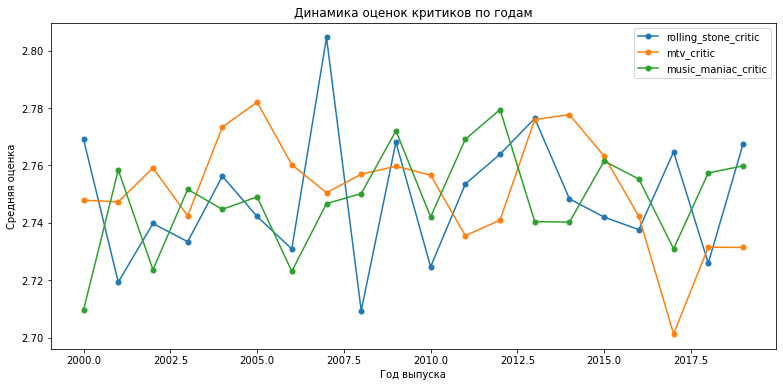

In [44]:
df_byyear.plot(marker='.', markersize=10, title = 'Динамика оценок критиков по годам', xlabel = 'Год выпуска', ylabel= 'Средняя оценка')
#вывод
#в целом разброс средних оценок невелик: между 2,7 и 2,8
#визуально кажется, что есть динамика на рост средней оценки альбомов от music_manic по годам
#Кажется, что зависимости между тремя оценками нет
#Проверить самые высокие и самые низкие средние оценки: у Роллинг стоунс в 2007 и в 2008, у MTV в 2017, у music_manic в 2000

In [5]:
#выделям 10 жанров по наибольшему кол-ву альбомов
top_genres = df_albums.genre.value_counts().sort_values(ascending = False).head(10).index.values
top_genres

array(['Indie', 'Pop', 'Rap', 'Latino', 'Pop-Rock', 'Rock', 'Punk',
       'Dance', 'Gospel', 'Compilation'], dtype=object)

In [29]:
#смотрим продажи в разрезе жанров и оценки критиков
tt = df_albums[df_albums.genre.isin(top_genres)].pivot_table(
                        index='genre', 
                        columns='rolling_stone_critic', 
                        values='num_of_sales', 
                        aggfunc=sum,
                        margins=True).fillna(0)

tt

rolling_stone_critic,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,All
genre,,,,,,,,,,,
Compilation,90981843,108395483,104002091,102715300,95870365,101087879,94372726,102055729,100128942,110382135,1009992493
Dance,195559778,179354991,175220745,197566233,166989499,192009677,200131433,174881668,201331435,198983962,1882029421
Gospel,109628260,96326497,78408945,114626276,98646296,106731068,108249765,97979524,94964971,99893268,1005454870
Indie,499608437,461389474,458487759,469763020,457617622,448687856,462558506,471061752,490187092,480443941,4699805459
Latino,196069753,186024146,213939843,206532834,195572413,209009206,199120296,178803305,191887525,176172690,1953132011
Pop,404276434,431279544,400606643,360832222,398132627,392796613,370501406,381363953,381510047,395338510,3916637999
Pop-Rock,196031275,182402129,212728777,179186198,173135583,206064732,199317089,209332964,179803744,200999983,1939002474
Punk,183316007,174894559,189774198,202438964,205428729,201757418,198451125,191628144,181553996,184888257,1914131397
Rap,282242771,267907570,276837070,301829995,302223319,287316463,308118313,284558868,296076249,281803568,2888914186


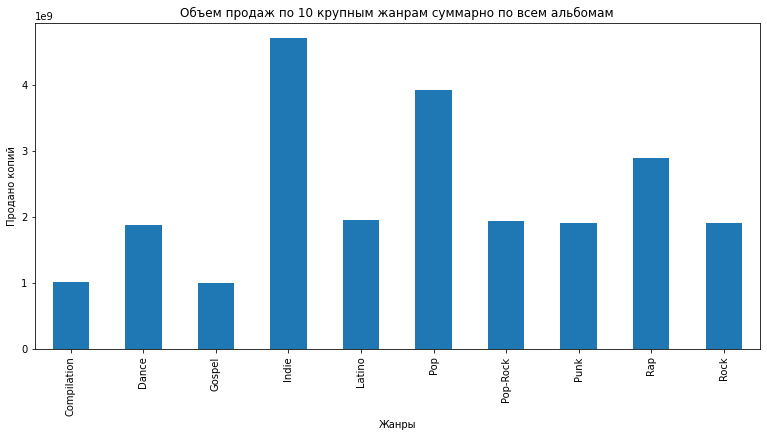

In [52]:
tt['All'].iloc[:-1].plot(kind='bar', xlabel = 'Жанры', ylabel ='Продано копий', title = 'Объем продаж по 10 крупным жанрам суммарно по всем альбомам')
#Вывод - жанры инди и поп самые продаваемые

In [48]:
#смотрим продажи в разрезе годов и топ-10 жанров
tt_years = df_albums[df_albums.genre.isin(top_genres)].pivot_table(
                        index='year_of_pub', 
                        columns='genre', 
                        values='num_of_sales', 
                        aggfunc=sum,
                        margins=False).fillna(0)

tt_years

genre,Compilation,Dance,Gospel,Indie,Latino,Pop,Pop-Rock,Punk,Rap,Rock
year_of_pub,,,,,,,,,,
2000,45670873,95441659,45344091,237517311,103961878,213863746,98494327,90539127,135960463,96837220
2001,55344949,105330101,57193621,238077506,86238457,181316320,91298520,105150086,159087072,87911086
2002,61524240,99857914,54724239,249454386,91343368,196411382,97272472,92328722,148845970,86885413
2003,54727775,80157256,55529694,218180776,97356492,191866654,99562188,93485085,145803002,94075944
2004,56754955,106794450,54009397,251641110,102754850,226132522,86593973,99366586,157502307,94239971
2005,45868842,74127966,64203494,237305227,90966272,198138547,103674815,89316213,135667282,112686670
2006,49508900,94211437,35294552,235077199,102639081,189354435,110919089,103886399,148318165,82666227
2007,50110060,91161199,43436586,261484159,94670132,199780651,104507707,97682055,137031879,89847499
2008,42757599,87584844,53795108,209826325,105517382,208237630,90466205,100157460,146529527,98609987


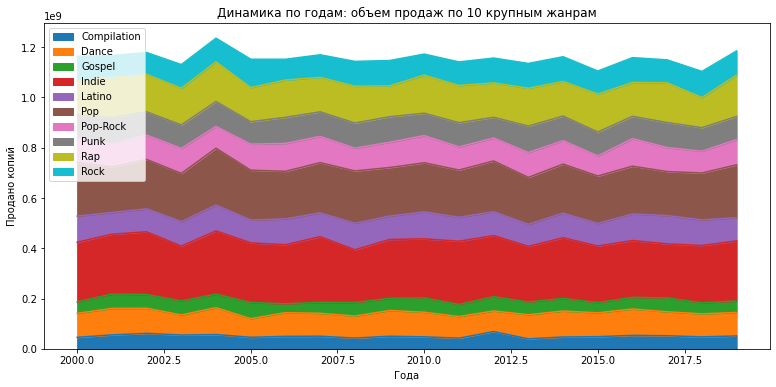

In [57]:
pl1 = tt_years.plot(kind='area', xlabel = 'Года', ylabel ='Продано копий', title = 'Динамика по годам: объем продаж по 10 крупным жанрам')
pl1.legend(loc='upper left')
#Вывод - в 2019 году наблюдается рост продаж. Аналогичный скачок был в 2004. В целом распрееление продаж между 
#жанрами сохраняется по годам. Хотя по самой правой точке видно усиление жанра рэп и поп.

'\nВыводы: самые высокие продажи в категории инди, по этом самые-самые у альбомов с самой низкой оценкой критиков.\nДалее идёт категория Поп, далее рэп.\nПродажи в жанре компиляция и госпел невысокие даже по альбомам с наивысшими оценками. В целом кажется, \nчто оценка критиков не влияет на продажи внутри жанра \n'

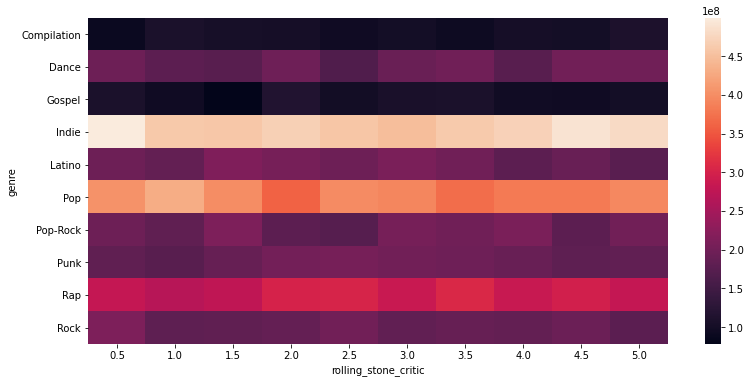

In [9]:
#Проверяем зависимость продаж от оценок критиков Ролинг стоунс.
sns.heatmap(tt)
"""
Выводы: самые высокие продажи в категории инди, по этом самые-самые у альбомов с самой низкой оценкой критиков.
Далее идёт категория Поп, далее рэп.
Продажи в жанре компиляция и госпел невысокие даже по альбомам с наивысшими оценками. 
Гипотеза= оценка критиков не влияет на продажи внутри жанра 
"""